In [1]:
from asyncore import read
import pandas as pd 

import math as mt 
import numpy
import numpy as np
from numpy import log as ln

from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sympy import *
from sympy.abc import theta
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm


In [2]:
#Import dados da tabela:
df = pd.read_csv('Pasta1.csv', header=1)

#Alterando dados da tabela tirando os logs:
df['hz'] = numpy.log(df['loghz'])
df['jy'] = numpy.log(df['logjy'])

print(df.head())


   loghz  logjy        hz        jy
0    7.0   4.12  1.945910  1.415853
1    7.3   4.45  1.987874  1.492904
2    7.7   4.33  2.041220  1.465568
3    8.0   4.14  2.079442  1.420696
4    8.3   3.91  2.116256  1.363537


Fazendo a plotagem dos dados obtemos:

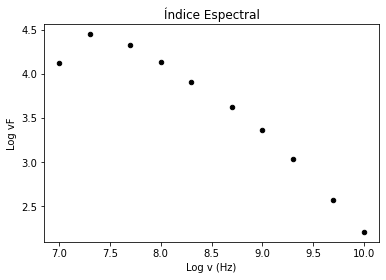

In [3]:
freq = np.array(df['loghz'],'float')
flux = np.array(df['logjy'], 'float')

plt.scatter(df['loghz'], df['logjy'], color='black', s=20)
plt.title('Índice Espectral')
plt.xlabel('Log v (Hz)')
plt.ylabel('Log vF')
plt.show()

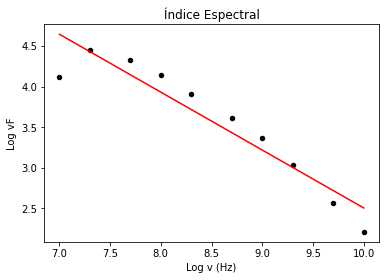

In [4]:
# Agora fazendo um ajuste da curva em uma linha: 
#Ajuste:
def func (x,a,b):
    return (a*x) +b

xdata = np.linspace(7 , 10, 50)
# Fazendo os calculos para obter a equação da reta, ou seja, y=ax+b é obtemos que:
# o Coeficiente angular é -0,7139, e o coeficente linear é 9,6437 
ydata = func(xdata, -0.7139, 9.6437)

params , pcov = curve_fit(func,xdata,ydata)

#Plotagem do gráfico com a reta ajustada:
plt.scatter(df['loghz'], df['logjy'], color='black', s=20)
plt.plot(xdata, func(xdata, *params), color ='red')
plt.title('Índice Espectral')
plt.xlabel('Log v (Hz)')
plt.ylabel('Log vF')
plt.show()

In [5]:
#Sabendo-se o coeficiente angular da reta ajustada, o módulo do valor é o nosso valor de alpha:

alpha = 0.7139
print ("O valor de alpha é", alpha)

O valor de alpha é 0.7139


Calculando o fluxo total integrando numericamente o espectro e estime a luminosidade em rádio de Cygnus A

In [6]:
#Para calcular o fluxo total é possível realizar a integral da reta ajustada.

def integral (xdata , ydata):
    N = len(xdata)
    I = 0.0
    for i in range(0,N-1):
        dx = xdata[i+1] - xdata[i]
        y0 = ydata[i]
        y1 = ydata[i+1]
        trap = I + (y1+y0)*dx/2.0
    return trap

F = integral(freq, flux)
print(F,'Jy')


0.7170000000000016 Jy


Expressando a Luminosidade em erg s−1

In [1]:
# Para expressar o resultado de SI units para CGS usamos a tranformação encontrada : https://en.wikipedia.org/wiki/Jansky
#   SI units	=   10^−26 W⋅m−2⋅Hz−1
#   CGS units	=   10^−23 erg⋅s−1⋅cm−2⋅Hz−1
# Realizando a transformação obtemos:
print("L = 7.2 X 10^44 erg⋅s−1⋅cm−2⋅Hz−1 ")

L = 7.2 X 10^44 erg⋅s−1⋅cm−2⋅Hz−1 


In [ ]:
# Professor neste exercicio como puxei os dados em arquivo csv, no próprio excel eu plotei o gráfico e nele aparece a equação da reta
# Por isso eu já entrei com os valores já definidos no plot do ajuste de linha
# A transformação eu fiz no caderno.